In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Read Dataset

In [2]:
df = pd.DataFrame()
# for dataset in ['2015','2016']:
# dataset = '2016'
# df = df.append(pd.read_csv('./Datasets/'+dataset+'.csv', sep='*',error_bad_lines=False, engine='python', usecols=['birthyear']))

for dataset in ['2016','2017']:
    df = df.append(pd.read_csv('./Datasets/'+dataset+'.csv', sep='*',error_bad_lines=False, engine='python'))

df.shape

Skipping line 123646: Expected 131 fields in line 123646, saw 134
Skipping line 123648: Expected 131 fields in line 123648, saw 134
Skipping line 123660: Expected 131 fields in line 123660, saw 134
Skipping line 123680: Expected 131 fields in line 123680, saw 134
Skipping line 123744: Expected 131 fields in line 123744, saw 134
Skipping line 123745: Expected 131 fields in line 123745, saw 134
Skipping line 123747: Expected 131 fields in line 123747, saw 134
Skipping line 123770: Expected 131 fields in line 123770, saw 134
Skipping line 123809: Expected 131 fields in line 123809, saw 134
Skipping line 123844: Expected 131 fields in line 123844, saw 134
Skipping line 123886: Expected 131 fields in line 123886, saw 134
Skipping line 123892: Expected 131 fields in line 123892, saw 134
Skipping line 123893: Expected 131 fields in line 123893, saw 134
Skipping line 123909: Expected 131 fields in line 123909, saw 134
Skipping line 123936: Expected 131 fields in line 123936, saw 134
Skipping l

Skipping line 194695: Expected 131 fields in line 194695, saw 134
Skipping line 194697: Expected 131 fields in line 194697, saw 134
Skipping line 194699: Expected 131 fields in line 194699, saw 134
Skipping line 194700: Expected 131 fields in line 194700, saw 134
Skipping line 194710: Expected 131 fields in line 194710, saw 134
Skipping line 194713: Expected 131 fields in line 194713, saw 134
Skipping line 194717: Expected 131 fields in line 194717, saw 134
Skipping line 194758: Expected 131 fields in line 194758, saw 134
Skipping line 194777: Expected 131 fields in line 194777, saw 134
Skipping line 194783: Expected 131 fields in line 194783, saw 134
Skipping line 194788: Expected 131 fields in line 194788, saw 134
Skipping line 194790: Expected 131 fields in line 194790, saw 134
Skipping line 194795: Expected 131 fields in line 194795, saw 134
Skipping line 194829: Expected 131 fields in line 194829, saw 134
Skipping line 194834: Expected 131 fields in line 194834, saw 134
Skipping l

Skipping line 236622: Expected 131 fields in line 236622, saw 134
Skipping line 236633: Expected 131 fields in line 236633, saw 134
Skipping line 236639: Expected 131 fields in line 236639, saw 134
Skipping line 236659: Expected 131 fields in line 236659, saw 134
Skipping line 236687: Expected 131 fields in line 236687, saw 134
Skipping line 236689: Expected 131 fields in line 236689, saw 134
Skipping line 236693: Expected 131 fields in line 236693, saw 134
Skipping line 236697: Expected 131 fields in line 236697, saw 134
Skipping line 236723: Expected 131 fields in line 236723, saw 134
Skipping line 236737: Expected 131 fields in line 236737, saw 134
Skipping line 236853: Expected 131 fields in line 236853, saw 134
Skipping line 236855: Expected 131 fields in line 236855, saw 134
Skipping line 236906: Expected 131 fields in line 236906, saw 134
Skipping line 236922: Expected 131 fields in line 236922, saw 134
Skipping line 236969: Expected 131 fields in line 236969, saw 134
Skipping l

Skipping line 275679: Expected 131 fields in line 275679, saw 134
Skipping line 275700: Expected 131 fields in line 275700, saw 134
Skipping line 275829: Expected 131 fields in line 275829, saw 134
Skipping line 275846: Expected 131 fields in line 275846, saw 134
Skipping line 275882: Expected 131 fields in line 275882, saw 134
Skipping line 275894: Expected 131 fields in line 275894, saw 134
Skipping line 275903: Expected 131 fields in line 275903, saw 134
Skipping line 275915: Expected 131 fields in line 275915, saw 134
Skipping line 275917: Expected 131 fields in line 275917, saw 134
Skipping line 275928: Expected 131 fields in line 275928, saw 134
Skipping line 275936: Expected 131 fields in line 275936, saw 134
Skipping line 275944: Expected 131 fields in line 275944, saw 134
Skipping line 275958: Expected 131 fields in line 275958, saw 134
Skipping line 275965: Expected 131 fields in line 275965, saw 134
Skipping line 275981: Expected 131 fields in line 275981, saw 134
Skipping l

/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(634594, 130)

### Remove IAT entries that have not been completed 

In [3]:
incomplete_attempts = df.session_status.str.contains('C')
df = df.loc[incomplete_attempts]
df.shape

(312945, 130)

### Remove IAT entries who have not submitted their DoB, birthsex and Race

In [4]:
df.dropna(subset=['birthyear'], how='all', inplace = True)

df.dropna(subset=['birthsex'], how='all', inplace = True)

df.dropna(subset=['ethnicityomb'], how='all', inplace = True)

df.dropna(subset=['anninc'], how='all', inplace = True)

   #### Explicit Associations submitted voluntarily by user

In [5]:
#df[['session_id','birthsex','assocareer','assofamily','impcareer','impfamily']]

#### User's personal info

In [6]:
#df[['session_id','birthsex','anninc','primary1','num_primary1a','secondary1','num_secondary1a','occuself']]

#### Evaluate birthsex to gender identity dropoff

In [7]:
# male_identity = df.birthsex == 1.0
# print df.loc[male_identity].shape

# female_identity = df.birthsex == 2.0
# print df.loc[female_identity].shape

# male_identity = df.genderidentity.str.contains('\[1\]')
# df.loc[male_identity]['genderidentity']
# print df.loc[male_identity].shape

# female_identity = df.genderidentity.str.contains('\[2\]')
# df.loc[female_identity]['genderidentity']
# print df.loc[female_identity].shape

# # df['birthsex'].unique()

#### User's IAT test scores  - Find out what each metric stands for !

In [8]:
score_df = df[['session_id','birthsex','D_biep.Male_Career_all','D_biep.Male_Career_36','D_biep.Male_Career_47']]

#### Plot IAT D scores - Red Threshold(Male-Career), Green Threshold(Female-Career)

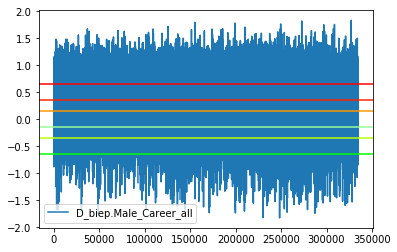

In [9]:
# mask=(score_df['timestamp'] >= start & df['timestamp'] <= end)
score_df.plot(y='D_biep.Male_Career_all')
plt.axhline(y=.15, color='#FF9900')
plt.axhline(y=.35, color='#FF2200')
plt.axhline(y=.65, color='#FF0000')

plt.axhline(y=-0.15, color='#99FF99')
plt.axhline(y=-0.35, color='#BBFF00')
plt.axhline(y=-0.65, color='#00FF00')

plt.show()

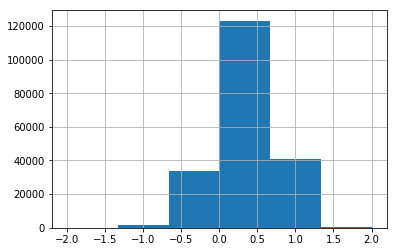

In [12]:
pd.Series(df['D_biep.Male_Career_all']).hist(bins=6, range=(-2,2))

In [11]:
fem_career_slight = score_df[(score_df['D_biep.Male_Career_all'] >= -0.15) & (score_df['D_biep.Male_Career_all'] <= 0.0)]
fem_career_moderate = score_df[(score_df['D_biep.Male_Career_all'] >= -0.35) & (score_df['D_biep.Male_Career_all'] <= -0.15)]
fem_career_heavy = score_df[(score_df['D_biep.Male_Career_all'] >= -1.0) & (score_df['D_biep.Male_Career_all'] <= -0.35)]

male_career_slight = score_df[(score_df['D_biep.Male_Career_all'] >= 0.0) & (score_df['D_biep.Male_Career_all'] <= 0.15)]
male_career_moderate = score_df[(score_df['D_biep.Male_Career_all'] >= 0.15) & (score_df['D_biep.Male_Career_all'] <= 0.35)]
male_career_heavy = score_df[(score_df['D_biep.Male_Career_all'] >= 0.35) & (score_df['D_biep.Male_Career_all'] <= 1.0)]


print "---------Statistics---------"
print "Total records:", len(score_df)
print "------------Male------------"
print "Male-Career-Slight: %f - %f%%"%(len(male_career_slight), (len(male_career_slight)/float(len(score_df))) * 100)
print "Male-Career-Moderate: %f - %f%%"%(len(male_career_moderate), (len(male_career_moderate)/float(len(score_df))) * 100)
print "Male-Career-Heavy: %f - %f%%"%(len(male_career_heavy), (len(male_career_heavy)/float(len(score_df))) * 100)
print "-----------Female-----------"
print "Female-Career-Slight: %f - %f%%"%(len(fem_career_slight), (len(fem_career_slight)/float(len(score_df))) * 100)
print "Female-Career-Moderate: %f - %f%%"%(len(fem_career_moderate), (len(fem_career_moderate)/float(len(score_df))) * 100)
print "Female-Career-Heavy: %f - %f%%"%(len(fem_career_heavy), (len(fem_career_heavy)/float(len(score_df))) * 100)

# df=df[fem_career_slightly]

---------Statistics---------
Total records: 203455
------------Male------------
Male-Career-Slight: 21655.000000 - 10.643631%
Male-Career-Moderate: 38051.000000 - 18.702416%
Male-Career-Heavy: 98461.000000 - 48.394485%
-----------Female-----------
Female-Career-Slight: 15270.000000 - 7.505345%
Female-Career-Moderate: 11861.000000 - 5.829790%
Female-Career-Heavy: 7778.000000 - 3.822958%
